In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from vrplib import read_solution

from pyvrp import Model, read
from pyvrp.plotting import (
    plot_coordinates,
    plot_instance,
    plot_result,
    plot_route_schedule,
)
from pyvrp.stop import MaxIterations, MaxRuntime


In [15]:
import re

def parse_homberger_txt(txt_path):
    with open(txt_path, encoding="utf-8") as f:
        lines = f.readlines()

    # 读取车辆数和容量
    vehicle_line = [l for l in lines if "VEHICLE" in l]
    idx = lines.index(vehicle_line[0])
    num_vehicles = int(lines[idx+2].split()[0])
    capacity = int(lines[idx+2].split()[1])

    # 找到CUSTOMER表头
    cust_idx = [i for i, l in enumerate(lines) if "CUSTOMER" in l][0]
    data_lines = lines[cust_idx+3:]
    customers = []
    for line in data_lines:
        if not line.strip():
            continue
        parts = re.split(r"\s+", line.strip())
        if len(parts) < 7:
            continue
        customers.append({
            "id": int(parts[0])+1,  # Homberger's index starts from 0, we start from 1
            "x": int(parts[1]),
            "y": int(parts[2]),
            "demand": int(parts[3]),
            "ready": int(parts[4]),
            "due": int(parts[5]),
            "service": int(parts[6]),
        })

    return num_vehicles, capacity, customers

def write_vrplib_vrp(filename, num_vehicles, capacity, customers):
    with open(filename, "w", encoding="utf-8") as f:
        f.write(f"NAME : {filename.split('.')[0].split('/')[1]}\n")
        f.write("TYPE : CVRPTW\n")
        f.write(f"DIMENSION : {len(customers)}\n")
        f.write(f"VEHICLES : {num_vehicles}\n")
        f.write(f"CAPACITY : {capacity}\n")
        f.write(f"SERVICE_TIME : {customers[1]['service']}\n")
        f.write("EDGE_WEIGHT_TYPE : EUC_2D\n")
        f.write("NODE_COORD_SECTION\n")
        for c in customers:
            f.write(f"{c['id']} {c['x']} {c['y']}\n")
        f.write("DEMAND_SECTION\n")
        for c in customers:
            f.write(f"{c['id']} {c['demand']}\n")
        f.write("TIME_WINDOW_SECTION\n")
        for c in customers:
            f.write(f"{c['id']} {c['ready']} {c['due']}\n")
        f.write("DEPOT_SECTION\n")
        f.write("1\n-1\nEOF\n")

# 用法
txt_path = "data/homberger_200_customer_instances/C1_2_1.TXT"
num_vehicles, capacity, customers = parse_homberger_txt(txt_path)
write_vrplib_vrp("data/C1_2_1.vrp", num_vehicles, capacity, customers)


In [16]:
INSTANCE = read("data/C1_2_1.vrp", round_func="dimacs")

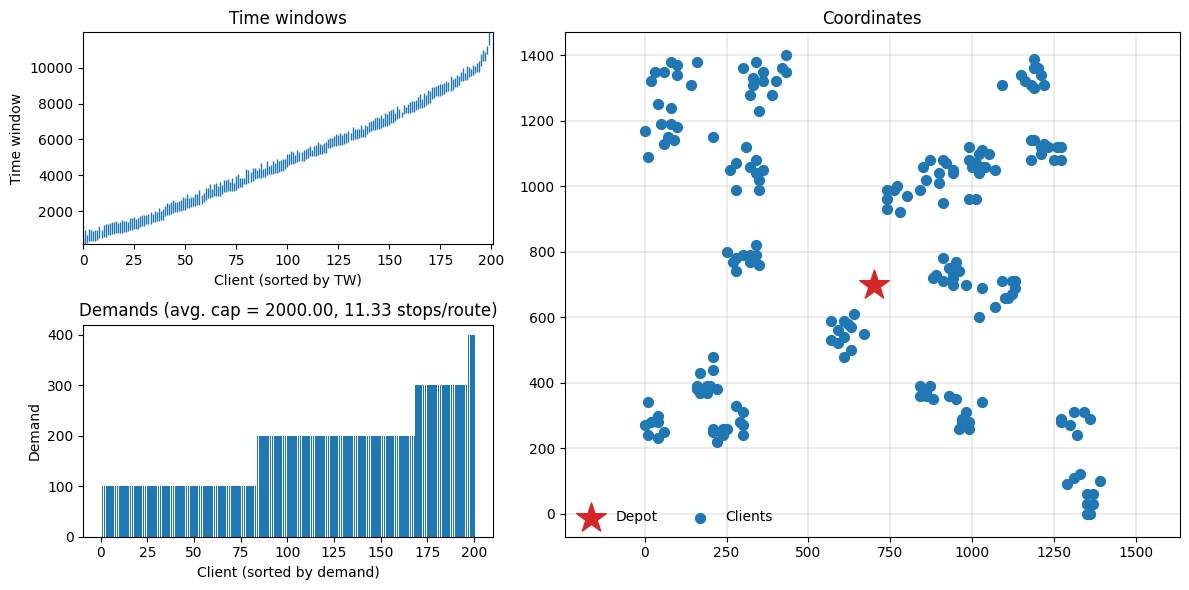

In [17]:
fig = plt.figure(figsize=(12, 6))
plot_instance(INSTANCE, fig)

In [26]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxRuntime(30), seed=42, display=False)
print(result)

Solution results
    # routes: 20
     # trips: 20
   # clients: 200
   objective: 26986
    distance: 26986
    duration: 207560
# iterations: 3141
    run-time: 30.00 seconds

Routes
------
Route #1: 57 118 83 143 176 36 33 121 165 188 108
Route #2: 60 82 180 84 191 125 4 72 17
Route #3: 190 5 10 193 46 128 106 167 34 95 158
Route #4: 113 155 78 175 13 43 2 90 67 39 107
Route #5: 73 116 12 129 11 6 122 139
Route #6: 164 66 147 160 47 91 70
Route #7: 32 171 65 86 115 94 51 174 136 189
Route #8: 148 103 197 124 141 69 200
Route #9: 20 41 85 80 31 25 172 77 110 162
Route #10: 45 178 27 173 154 24 61 100 64 179 109
Route #11: 170 134 50 156 112 168 79 29 87 42 123
Route #12: 133 48 26 152 40 153 169 89 105 15 59 198
Route #13: 21 23 182 75 163 194 145 195 52 92
Route #14: 30 120 19 192 196 97 14 96 130 28 74 149
Route #15: 62 131 44 102 146 68 76
Route #16: 114 159 38 150 22 151 16 140 187 142 111 63 56
Route #17: 177 3 88 8 186 127 98 157 137 183
Route #18: 93 55 135 58 184 199 37 81 13

In [30]:
cost = result.cost() / 10
print(f"Found a solution with cost: {cost}.")

Found a solution with cost: 2698.6.


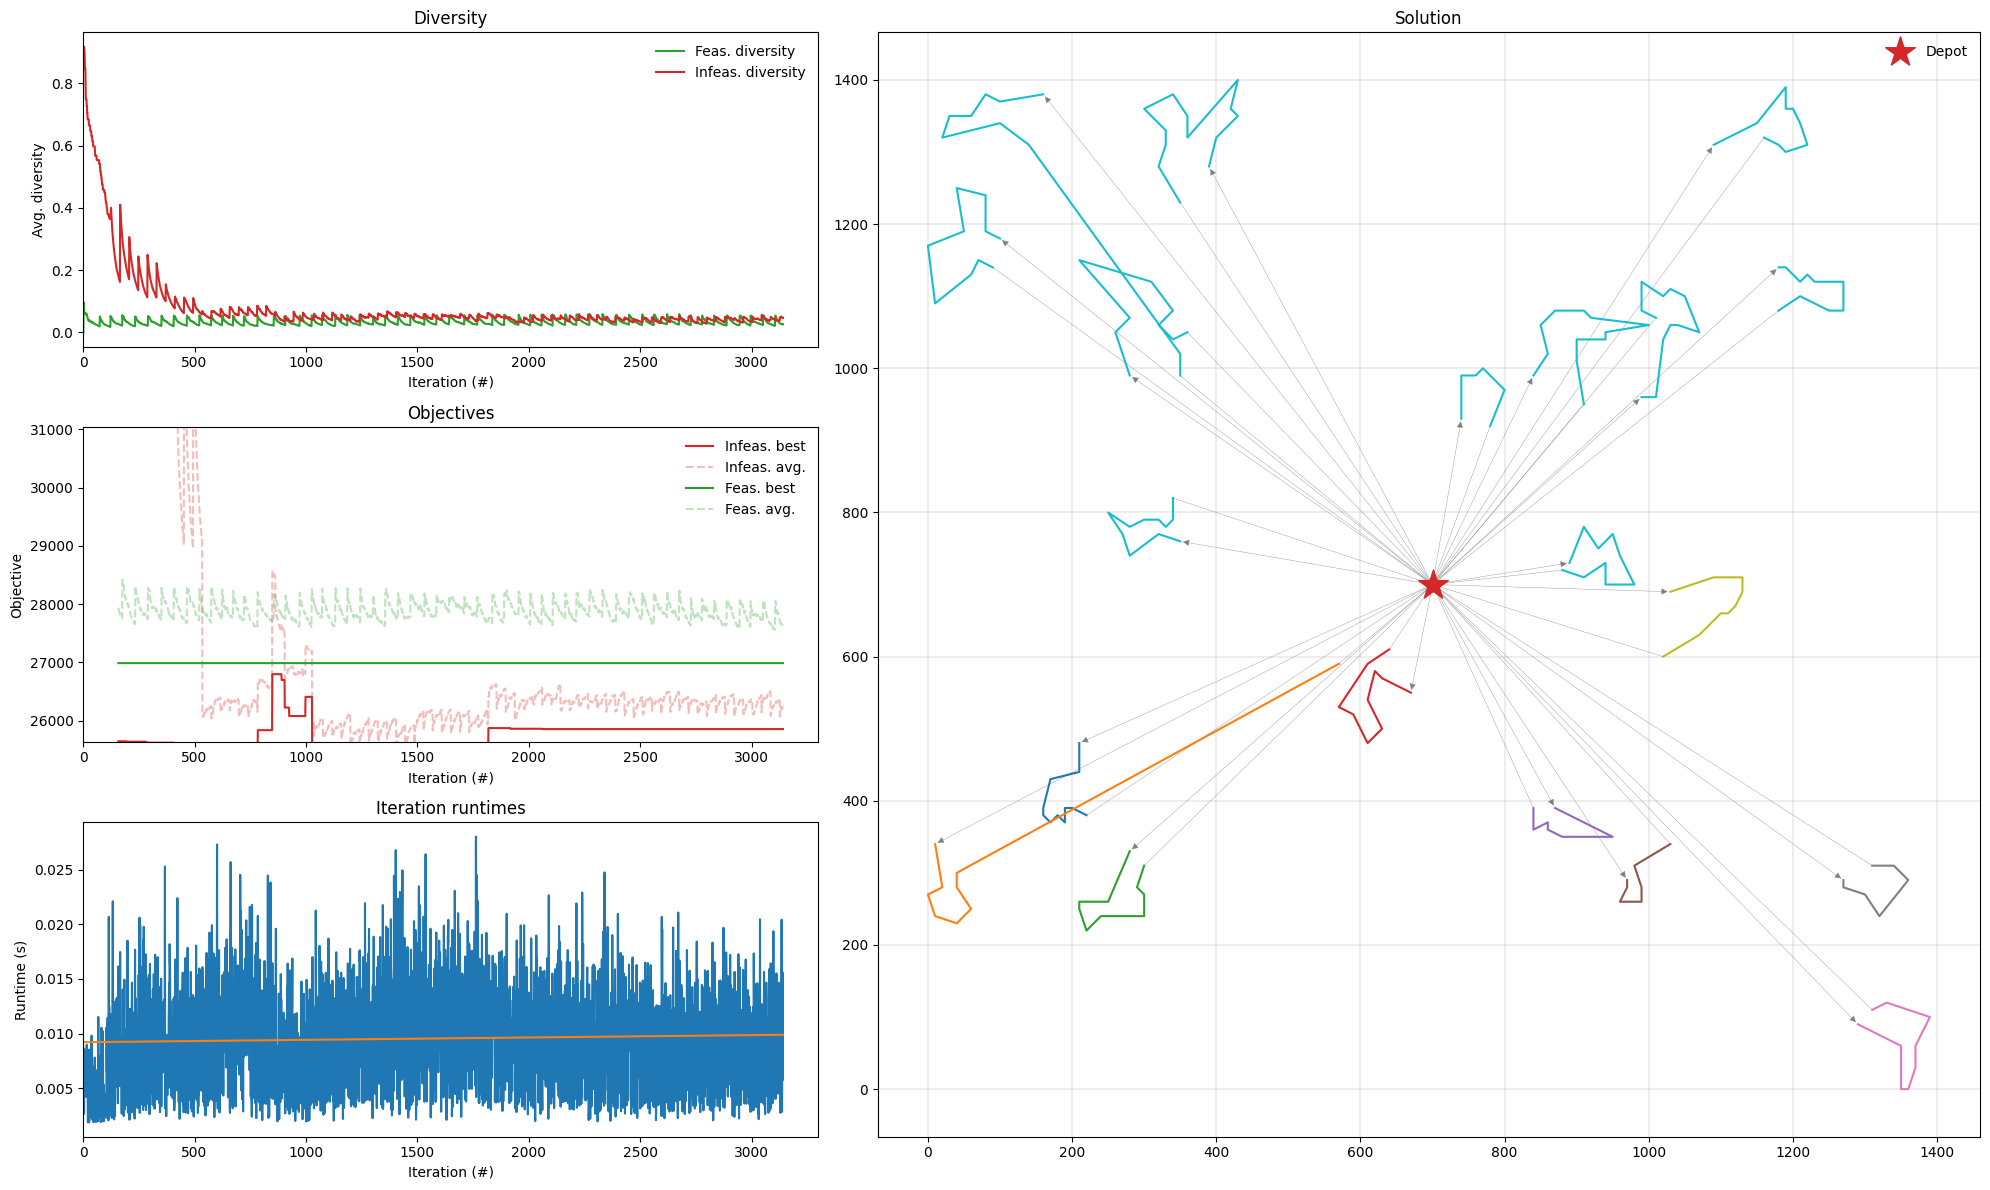

In [31]:
plot_result(result, INSTANCE)
plt.tight_layout()